In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("/content/gdrive/My Drive/Price_Drop.xlsx")
data.head()

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-0.260110,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-0.210761,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-0.296093,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-0.302262,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-0.331049,True,True


In [ ]:
df = data.copy()
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-0.260110,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-0.210761,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-0.296093,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-0.302262,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-0.331049,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         3491 non-null   int64         
 1   name                3491 non-null   object        
 2   unit_number         3491 non-null   object        
 3   beds                3491 non-null   int64         
 4   baths               3491 non-null   float64       
 5   sqft                3491 non-null   int64         
 6   neighborhood_name   3467 non-null   object        
 7   concession_title    2586 non-null   object        
 8   updated_on          3491 non-null   datetime64[ns]
 9   old_price           3491 non-null   int64         
 10  new_price           3491 non-null   int64         
 11  max_price           3491 non-null   int64         
 12  net_price           3491 non-null   int64         
 13  price_per_sqft      3491 non-null   float64     

In [ ]:
df['concession_title'] = df['concession_title'].fillna("No concession")
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-0.260110,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-0.210761,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-0.296093,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-0.302262,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-0.331049,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         3491 non-null   int64         
 1   name                3491 non-null   object        
 2   unit_number         3491 non-null   object        
 3   beds                3491 non-null   int64         
 4   baths               3491 non-null   float64       
 5   sqft                3491 non-null   int64         
 6   neighborhood_name   3467 non-null   object        
 7   concession_title    3491 non-null   object        
 8   updated_on          3491 non-null   datetime64[ns]
 9   old_price           3491 non-null   int64         
 10  new_price           3491 non-null   int64         
 11  max_price           3491 non-null   int64         
 12  net_price           3491 non-null   int64         
 13  price_per_sqft      3491 non-null   float64     

In [ ]:
df.describe()

,building_id,beds,baths,sqft,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change
count,3491.000000,3491.000000,3491.000000,3491.000000,3491,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1375.016328,1.014609,1.234890,800.947579,2020-08-04 17:06:51.030723072,2416.578058,2386.775423,2898.484675,2287.667144,2.878156,-0.187332
min,1.000000,0.000000,0.000000,229.000000,2019-11-26 16:40:22.280000,190.000000,919.000000,951.000000,919.000000,1.429000,-0.769676
25%,56.000000,0.000000,1.000000,608.000000,2020-08-02 11:24:15.393999872,1800.500000,1765.000000,2135.000000,1700.500000,2.483500,-0.256823
50%,103.000000,1.000000,1.000000,731.000000,2020-08-10 14:24:56.783000064,2175.000000,2150.000000,2608.000000,2053.000000,2.836000,-0.174263
75%,293.000000,1.000000,1.000000,896.000000,2020-08-12 10:17:23.664000,2682.500000,2655.500000,3100.000000,2544.000000,3.199000,-0.099872
max,6378.000000,4.000000,3.000000,3249.000000,2020-08-12 19:21:59.631000,18500.000000,13750.000000,18500.000000,13468.000000,5.861000,0.000000
std,2431.614660,0.778702,0.480088,290.347891,NaN,1047.193880,1013.806034,1546.164906,966.565668,0.547228,0.121552


<ipython-input-50-edf38b03a3c5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'updated_on'}>,
        <Axes: title={'center': 'old_price'}>],
       [<Axes: title={'center': 'new_price'}>,
        <Axes: title={'center': 'max_price'}>,
        <Axes: title={'center': 'net_price'}>],
       [<Axes: title={'center': 'price_per_sqft'}>,
        <Axes: title={'center': 'percentage_change'}>, <Axes: >]],
      dtype=object)

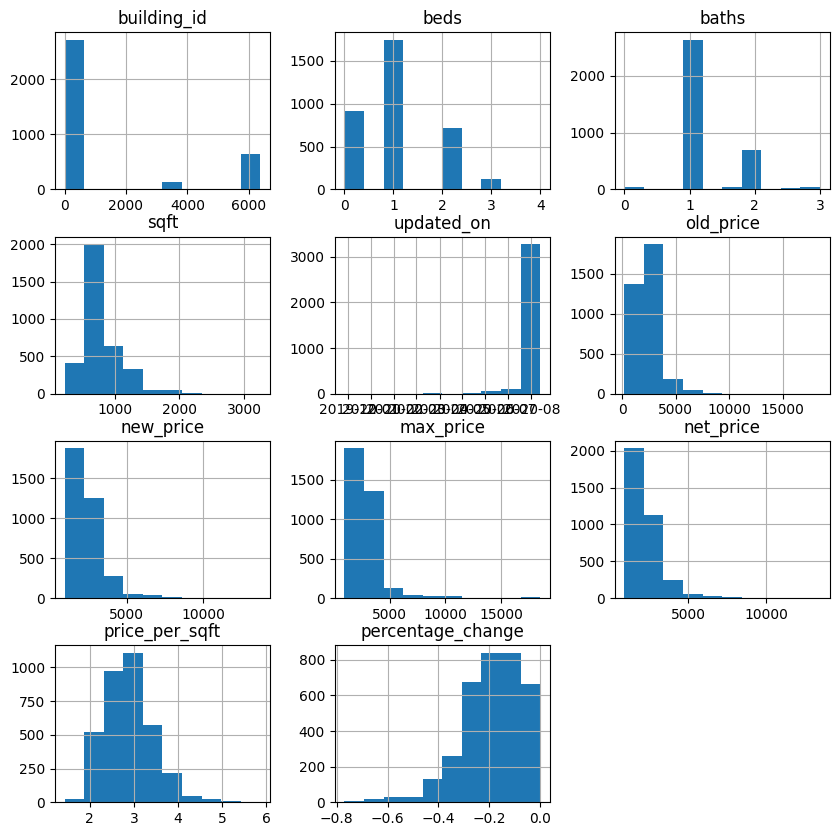

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax=ax)

In [ ]:
# We can see that single bed or single bath houses are more than the rest
# Majority of houses have less than 1200 sqft
# Houses with less old price have majorly increased their prices while previously houses with greater price have decreased their prices
# Houses with cheap net price are more than the expensive houses
# Price per sqft and percentage of change is normal

In [ ]:
cols = df.columns
cols

Index(['building_id', 'name', 'unit_number', 'beds', 'baths', 'sqft',
       'neighborhood_name', 'concession_title', 'updated_on', 'old_price',
       'new_price', 'max_price', 'net_price', 'price_per_sqft',
       'percentage_change', 'cooperate', 'concession_applied'],
      dtype='object')

In [ ]:
num_cols = ['beds', 'baths', 'sqft','old_price', 'new_price', 'max_price', 'net_price', 'price_per_sqft','percentage_change']
num_cols

['beds',
 'baths',
 'sqft',
 'old_price',
 'new_price',
 'max_price',
 'net_price',
 'price_per_sqft',
 'percentage_change']

In [ ]:
df_numerical = df[num_cols]
df_numerical

,beds,baths,sqft,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change
0,1,1.0,730,2268,2313,2918,2159,2.957,-0.260110
1,1,1.0,765,2419,2467,2918,2303,3.010,-0.210761
2,1,1.0,645,2158,2201,2918,2054,3.185,-0.296093
3,1,1.0,710,2178,2181,2918,2036,2.867,-0.302262
4,1,1.0,710,2088,2091,2918,1952,2.749,-0.331049
...,...,...,...,...,...,...,...,...,...
3486,2,2.0,1405,3289,3275,3830,2948,2.098,-0.230287
3487,2,2.0,1399,3622,3606,3830,3245,2.320,-0.152742
3488,2,2.0,1244,3375,3361,3830,3025,2.432,-0.210183
3489,2,2.0,1174,3409,3396,3830,3056,2.603,-0.202089


<Axes: >

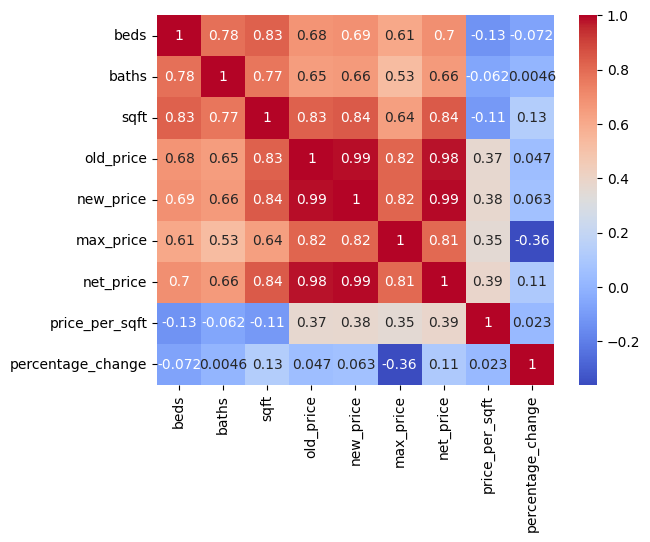

In [ ]:
df_corr = df_numerical.corr()
sns.heatmap(df_corr, cmap='coolwarm', annot=True)

In [ ]:
# We can see that percentage change and price per sqft is not effecting much on the dataset
# Dropping these columns

In [ ]:
df = df.drop(["percentage_change", "price_per_sqft"], axis = 1)
df_numerical = df_numerical.drop(["percentage_change", "price_per_sqft"], axis = 1)
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,True,True


<Axes: >

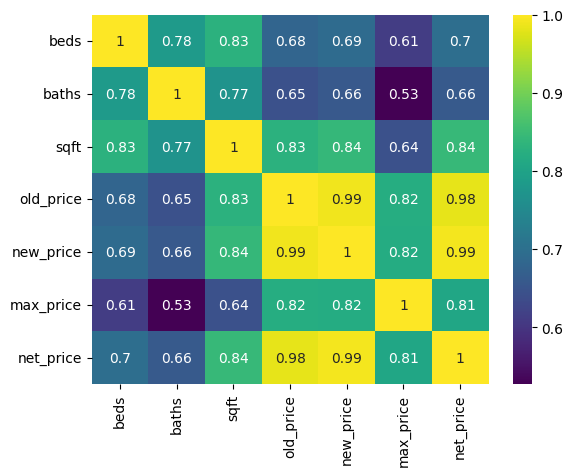

In [ ]:
df_corr = df_numerical.corr()
sns.heatmap(df_corr, cmap='viridis', annot=True)

In [ ]:
# The heatmap shows that there is a strong multicollinearity between prices
# Checking Multicollinearity using variance inflation factor

In [ ]:
vif = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
vif = pd.Series(vif, index = df_numerical.columns)
vif

beds           6.941534
baths         18.619643
sqft          42.754352
old_price    296.862506
new_price    673.248098
max_price     14.832319
net_price    417.355201
dtype: float64

In [ ]:
# We can see a storng multicollinearity in old_price, new_price and net_price
# As clients are more focused on net_price, seeing multicollinearity between the other two

In [ ]:
df_vif = df_numerical.drop(["net_price"], axis=1)

In [ ]:
vif = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif = pd.Series(vif, index = df_vif.columns)
vif

beds           6.936750
baths         18.619605
sqft          42.224833
old_price    295.053165
new_price    330.657862
max_price     14.776636
dtype: float64

In [ ]:
# So, the multicollinearity didn't finish, so dropping both columns
df = df.drop(["old_price", "new_price"], axis=1)
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,max_price,net_price,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2918,2159,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2918,2303,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2918,2054,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2918,2036,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2918,1952,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3830,2948,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3830,3245,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3830,3025,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3830,3056,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         3491 non-null   int64         
 1   name                3491 non-null   object        
 2   unit_number         3491 non-null   object        
 3   beds                3491 non-null   int64         
 4   baths               3491 non-null   float64       
 5   sqft                3491 non-null   int64         
 6   neighborhood_name   3467 non-null   object        
 7   concession_title    3491 non-null   object        
 8   updated_on          3491 non-null   datetime64[ns]
 9   max_price           3491 non-null   int64         
 10  net_price           3491 non-null   int64         
 11  cooperate           3491 non-null   bool          
 12  concession_applied  3491 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64

In [ ]:
df.describe()

,building_id,beds,baths,sqft,updated_on,max_price,net_price
count,3491.000000,3491.000000,3491.000000,3491.000000,3491,3491.000000,3491.000000
mean,1375.016328,1.014609,1.234890,800.947579,2020-08-04 17:06:51.030723072,2898.484675,2287.667144
min,1.000000,0.000000,0.000000,229.000000,2019-11-26 16:40:22.280000,951.000000,919.000000
25%,56.000000,0.000000,1.000000,608.000000,2020-08-02 11:24:15.393999872,2135.000000,1700.500000
50%,103.000000,1.000000,1.000000,731.000000,2020-08-10 14:24:56.783000064,2608.000000,2053.000000
75%,293.000000,1.000000,1.000000,896.000000,2020-08-12 10:17:23.664000,3100.000000,2544.000000
max,6378.000000,4.000000,3.000000,3249.000000,2020-08-12 19:21:59.631000,18500.000000,13468.000000
std,2431.614660,0.778702,0.480088,290.347891,NaN,1546.164906,966.565668


In [ ]:
# Now to make a model, we need to remove more unnecessary columns
# Building_id, name, unit_number and updated_on have no contribution to the net price of the building.
# Moreover, concession_title can't be fed to the model
# So, dropping these columns

In [ ]:
df = df.drop(["building_id", "updated_on", "concession_title", "unit_number","name"], axis=1)
df

,beds,baths,sqft,neighborhood_name,max_price,net_price,cooperate,concession_applied
0,1,1.0,730,South Loop,2918,2159,True,True
1,1,1.0,765,South Loop,2918,2303,True,True
2,1,1.0,645,South Loop,2918,2054,True,True
3,1,1.0,710,South Loop,2918,2036,True,True
4,1,1.0,710,South Loop,2918,1952,True,True
...,...,...,...,...,...,...,...,...
3486,2,2.0,1405,River North,3830,2948,True,True
3487,2,2.0,1399,River North,3830,3245,True,True
3488,2,2.0,1244,River North,3830,3025,True,True
3489,2,2.0,1174,River North,3830,3056,True,True


In [ ]:
# The baths column is in float, Changing it to integer
df["baths"] = df["baths"].astype("int")
df

,beds,baths,sqft,neighborhood_name,max_price,net_price,cooperate,concession_applied
0,1,1,730,South Loop,2918,2159,True,True
1,1,1,765,South Loop,2918,2303,True,True
2,1,1,645,South Loop,2918,2054,True,True
3,1,1,710,South Loop,2918,2036,True,True
4,1,1,710,South Loop,2918,1952,True,True
...,...,...,...,...,...,...,...,...
3486,2,2,1405,River North,3830,2948,True,True
3487,2,2,1399,River North,3830,3245,True,True
3488,2,2,1244,River North,3830,3025,True,True
3489,2,2,1174,River North,3830,3056,True,True


In [ ]:
# Changing neighborhood_name, cooperate and concession_applied to numericals/dummies so they can be fed to the model

In [ ]:
df['cooperate'] = df['cooperate'].replace([True, False], [1, 0])
df['concession_applied'] = df['concession_applied'].replace([True, False], [1, 0])
df['neighborhood_name'] = df['neighborhood_name'].replace(list(pd.unique(df["neighborhood_name"])), list(range(len(list(pd.unique(df["neighborhood_name"]))))))
df

,beds,baths,sqft,neighborhood_name,max_price,net_price,cooperate,concession_applied
0,1,1,730,0,2918,2159,1,1
1,1,1,765,0,2918,2303,1,1
2,1,1,645,0,2918,2054,1,1
3,1,1,710,0,2918,2036,1,1
4,1,1,710,0,2918,1952,1,1
...,...,...,...,...,...,...,...,...
3486,2,2,1405,3,3830,2948,1,1
3487,2,2,1399,3,3830,3245,1,1
3488,2,2,1244,3,3830,3025,1,1
3489,2,2,1174,3,3830,3056,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   beds                3491 non-null   int64
 1   baths               3491 non-null   int64
 2   sqft                3491 non-null   int64
 3   neighborhood_name   3491 non-null   int64
 4   max_price           3491 non-null   int64
 5   net_price           3491 non-null   int64
 6   cooperate           3491 non-null   int64
 7   concession_applied  3491 non-null   int64
dtypes: int64(8)
memory usage: 218.3 KB


In [ ]:
# Now the dataset is ready to be fed into the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
def train(df):
  # Making independent and dependent variables
  X = df.drop(["net_price"], axis=1)
  Y = df["net_price"]
  # Splitting the dataset into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
  accuracy = []
  error = []
  K=5
  for fold in range(0, K):
    model = RandomForestRegressor()
    scaler = StandardScaler()

    # Scaling X_train, we scale the data because it helps the algorithm to converge
    # and helps the algorithm to not be greedy with large values
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    trained_model = model.fit(X_train, y_train)

    # Generate predictions on test sample
    y_pred = trained_model.predict(X_test)
    accuracy1 = trained_model.score(X_test, y_test)
    print("Accuracy: ", accuracy1)

    # Compute accuracy, using mean absolute error
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    accuracy.append(accuracy1)
    error.append(mae)
    print(f"Fold {fold + 1}: MAE = {mae:.3f}")

  print(f"Average MAE: {(sum(error) / len(error)):.2f}")
  print(f"Average Accuracy: {(sum(accuracy) / len(accuracy))*100:.2f}" + " %")

  return model,X

In [ ]:
model,X = train(df)

Accuracy:  0.9611896489452023
Fold 1: MAE = 96.497
Accuracy:  0.9633923268189727
Fold 2: MAE = 96.136
Accuracy:  0.9621140751397996
Fold 3: MAE = 96.073
Accuracy:  0.9640227507305674
Fold 4: MAE = 95.388
Accuracy:  0.9628617275665338
Fold 5: MAE = 95.996
Average MAE: 96.02
Average Accuracy: 96.27 %


Text(0.5, 0, 'Relative Importance')

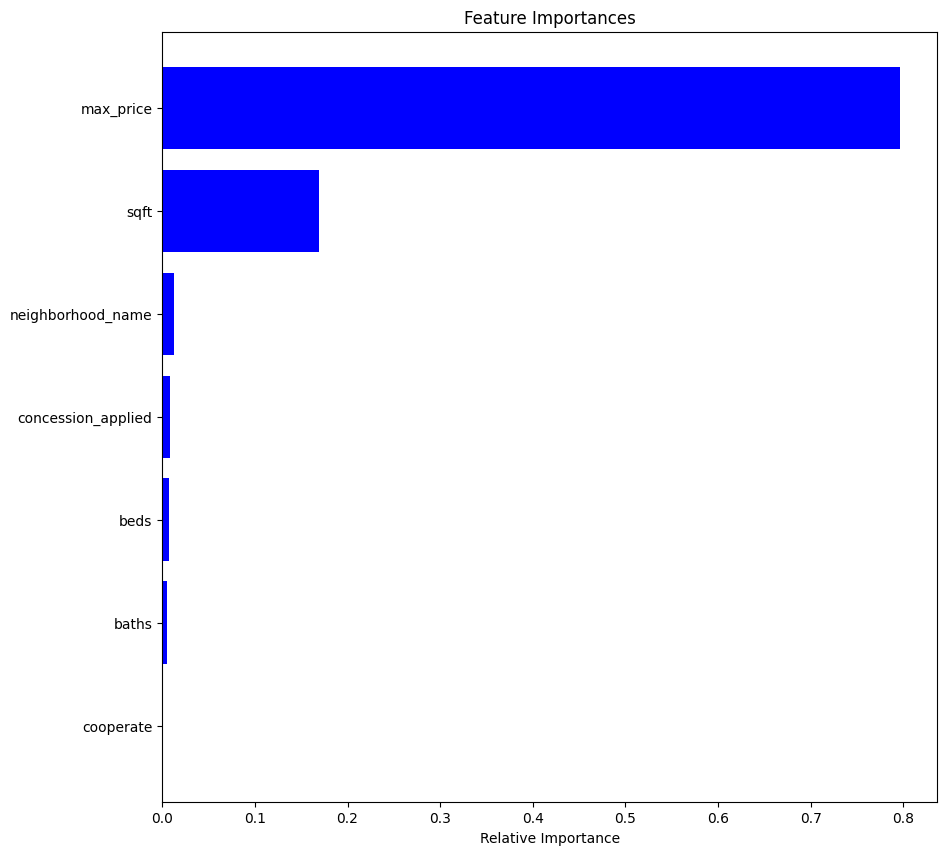

In [ ]:

features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')


In [ ]:
# We can see that max price and sqft have the highest effect on the model, then comes neighborhood and concession.
# Number of beds and baths have lowest effect. But as we are dealing with clients and they need to put demand of beds and baths. We cannot drop them.
# But the feature cooperate needs to be dropped

In [ ]:
# So, dropping cooperate
df = df.drop(["cooperate"], axis = 1)
df

,beds,baths,sqft,neighborhood_name,max_price,net_price,concession_applied
0,1,1,730,0,2918,2159,1
1,1,1,765,0,2918,2303,1
2,1,1,645,0,2918,2054,1
3,1,1,710,0,2918,2036,1
4,1,1,710,0,2918,1952,1
...,...,...,...,...,...,...,...
3486,2,2,1405,3,3830,2948,1
3487,2,2,1399,3,3830,3245,1
3488,2,2,1244,3,3830,3025,1
3489,2,2,1174,3,3830,3056,1


In [ ]:
# Training the model again

In [ ]:
model,_ = train(df)

Accuracy:  0.9622915399229373
Fold 1: MAE = 96.033
Accuracy:  0.9636361662988956
Fold 2: MAE = 94.318
Accuracy:  0.961606798919983
Fold 3: MAE = 94.913
Accuracy:  0.9622332198164743
Fold 4: MAE = 96.370
Accuracy:  0.9598261455641137
Fold 5: MAE = 96.218
Average MAE: 95.57
Average Accuracy: 96.19 %


In [ ]:
# The trained model can be deployed for net price estimation to the client